![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [274]:
import warnings
warnings.filterwarnings('ignore')

In [275]:
# Importación librerías
import pandas as pd
import numpy as np

In [276]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [277]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [98]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,20,26,305
1,2017,5362,9,16,489
2,2014,50300,35,10,211
3,2004,132160,47,2,27
4,2015,25226,19,16,248


In [99]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [100]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


# DESARROLLO DE LAB 

In [265]:
# Tranformacion de variables categoricas en Train y Test
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Aplicar codificación de etiquetas a las variables categóricas
dataTraining['State'] = label_encoder.fit_transform(dataTraining['State'])
dataTraining['Make'] = label_encoder.fit_transform(dataTraining['Make'])
dataTraining['Model'] = label_encoder.fit_transform(dataTraining['Model'])

dataTesting['State'] = label_encoder.fit_transform(dataTesting['State'])
dataTesting['Make'] = label_encoder.fit_transform(dataTesting['Make'])
dataTesting['Model'] = label_encoder.fit_transform(dataTesting['Model'])

# Mostrar las primeras filas del dataset transformado
print(dataTesting.head())


    Year  Mileage  State  Make  Model
ID                                   
0   2014    31909     20    26    305
1   2017     5362      9    16    489
2   2014    50300     35    10    211
3   2004   132160     47     2     27
4   2015    25226     19    16    248


In [266]:
# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']  

In [267]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)



## Random Forest

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Definición de modelo Random Forest para un problema de regresión con paralelización
reg = RandomForestRegressor(n_estimators=150, max_features=3, max_depth = 15, random_state=1, n_jobs=-1)

# Entrenamiento del modelo
reg.fit(XTrain, yTrain)



RandomForestRegressor(max_depth=15, max_features=3, n_estimators=150, n_jobs=-1,
                      random_state=1)

In [260]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Hacer predicciones sobre el conjunto de prueba
y_pred = reg.predict(XTest)

# Calcular el error RMSE
rmse = np.sqrt(mean_squared_error(yTest, y_pred))
print("RMSE:", rmse)


RMSE: 3683.9700815755905


In [255]:
## Predicciones Random Forest - Test
y_pred = reg.predict(dataTesting)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']



In [256]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,19021.060626
1,36847.844321
2,22427.454619
3,8933.214108
4,30423.545062


### Tunning Random Forest

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rg = RandomForestRegressor(n_jobs=-1)
pd.Series(cross_val_score(rg, X, y, cv=10)).describe()

count    10.000000
mean      0.876764
std       0.002394
min       0.871551
25%       0.875951
50%       0.877521
75%       0.878240
max       0.879287
dtype: float64

Text(0, 0.5, 'Accuracy')

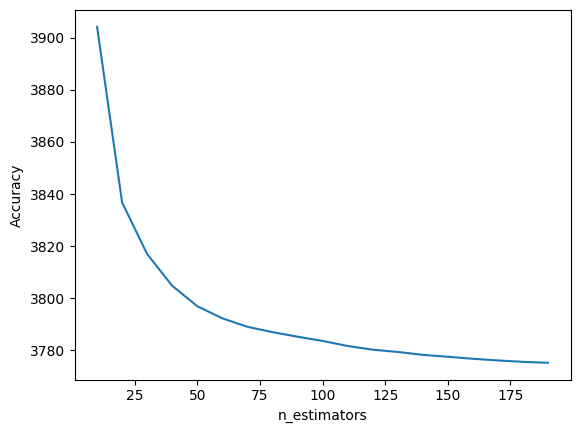

In [234]:
# Calibración de n_estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 200, 10)

# Definición de lista para almacenar el RMSE (Root Mean Squared Error) promedio para cada valor de n_estimators
rmse_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error')
    rmse_scores.append(np.sqrt(np.mean(np.abs(scores))))

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [ ]:
# Calibración de n_estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt


# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 200, 10)

# Definición de lista para almacenar el RMSE (Root Mean Squared Error) promedio para cada valor de n_estimators
r2_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf, XTrain, yTrain, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

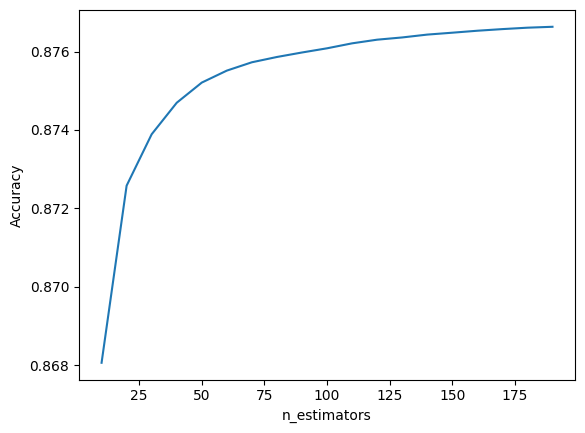

In [243]:
plt.plot(estimator_range, r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

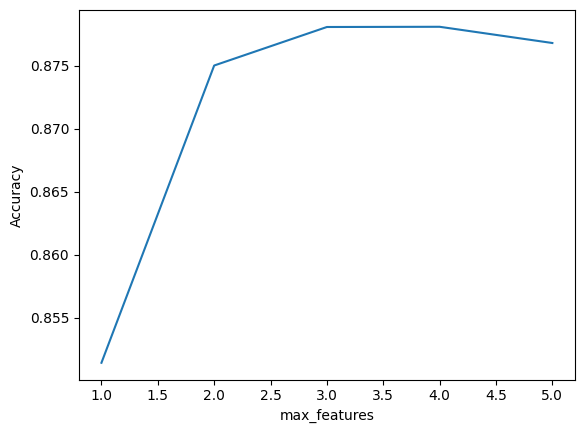

In [241]:
# Calibracióm max_features
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, XTrain.shape[1] + 1)

# Definición de lista para almacenar el R^2 promedio para cada valor de max_features
r2_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestRegressor(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    scores = cross_val_score(clf, X, y, cv=5, scoring='r2')
    r2_scores.append(scores.mean())

plt.plot(feature_range, r2_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

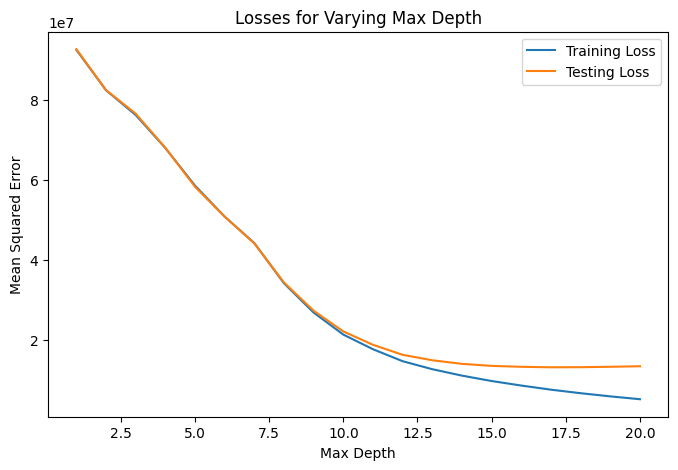

In [184]:
# Random Forest - Tunning de max depth para ver overfitting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Vary max_depth hyperparameter
max_depths = list(range(1, 21))
train_losses_depth = []
test_losses_depth = []

for max_depth in max_depths:
    rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(XTrain, yTrain)
    
    train_pred = rf.predict(XTrain)
    test_pred = rf.predict(XTest)
    
    train_loss = mean_squared_error(yTrain, train_pred)
    test_loss = mean_squared_error(yTest, test_pred)
    
    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)

# Plot the training and testing losses for max_depth
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(max_depths, train_losses_depth, label="Training Loss")
ax1.plot(max_depths, test_losses_depth, label="Testing Loss")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Squared Error")
ax1.legend()
ax1.set_title("Losses for Varying Max Depth")

plt.show()


## XGBoost

In [269]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Definir el modelo XGBoost para un problema de regresión con paralelismo
clf = XGBRegressor(n_estimators = 300, learning_rate = 0.1, max_depth = 12, reg_lambda=20, n_jobs=-1)

Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Entrenar el modelo
clf.fit(XTrain, yTrain)

# Realizar predicciones
y_pred = clf.predict(XTest)

# Calcular el RMSE (Root Mean Squared Error)
rmse = mean_squared_error(yTest, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 3752.052268859376


In [210]:
# Guardar predicciones en formato exigido en la competencia de kaggle
## Predicciones XGBoost - Test
y_pred = clf.predict(dataTesting)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']


y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,17801.460938
1,36137.671875
2,15275.351562
3,8811.588867
4,30517.173828


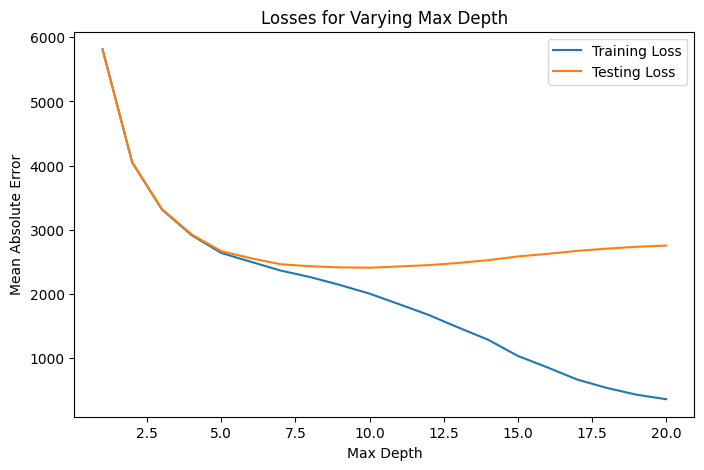

In [273]:
# XGB - Tunning de max depth para ver overfitting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Vary max_depth hyperparameter
max_depths = list(range(1, 21))
train_losses_depth = []
test_losses_depth = []

for max_depth in max_depths:
    rf = XGBRegressor(n_estimators=100, max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(XTrain, yTrain)
    
    train_pred = rf.predict(XTrain)
    test_pred = rf.predict(XTest)
    
    train_loss = mean_absolute_error(yTrain, train_pred)
    test_loss = mean_absolute_error(yTest, test_pred)
    
    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)

# Plot the training and testing losses for max_depth
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(max_depths, train_losses_depth, label="Training Loss")
ax1.plot(max_depths, test_losses_depth, label="Testing Loss")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Absolute Error")
ax1.legend()
ax1.set_title("Losses for Varying Max Depth")

plt.show()


In [202]:
# Calibracion de numero de n_estimators
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Define the XGBRegressor model
model = XGBRegressor()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500, 600]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(XTrain, yTrain)

# Print the best parameters and corresponding mean squared error
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(XTest)
test_mse = mean_squared_error(yTest, y_pred)
print("Test MSE:", test_mse)


Best Parameters: {'n_estimators': 400}
Best MSE: 14017088.839611087
Test MSE: 14202341.821091697


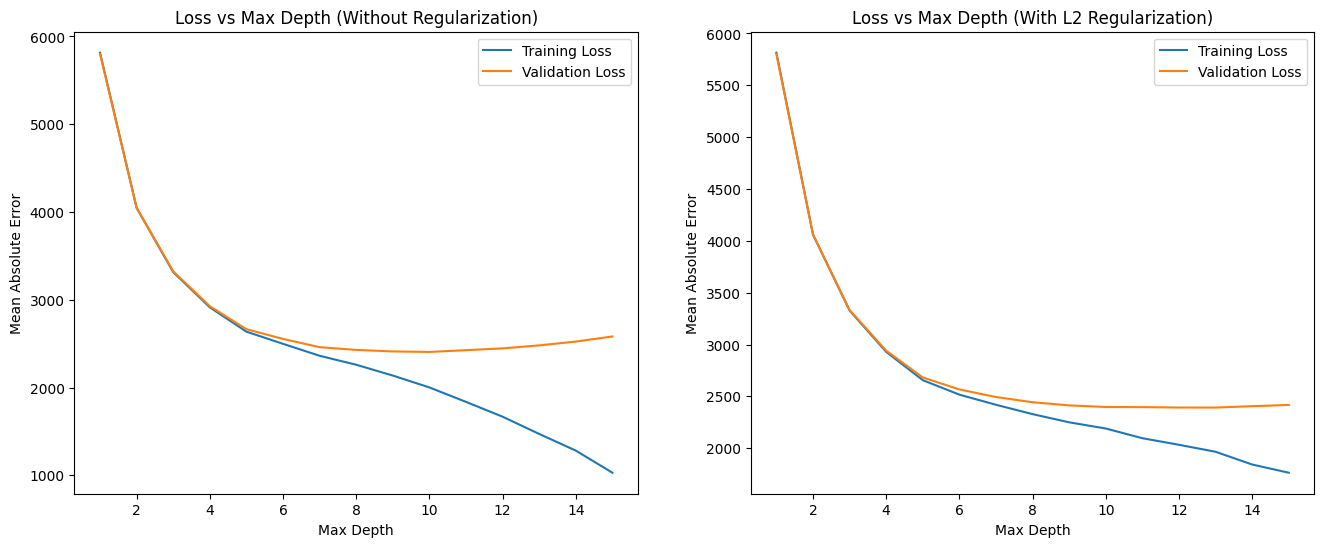

In [272]:
#Regularización y overfitting
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

train_losses_reg = []
val_losses_reg = []

max_depths = list(range(1, 16))

for max_depth in max_depths:
    # Train XGBoost without regularization
    xgb_model = xgb.XGBRegressor(max_depth=max_depth, random_state=42, n_jobs=-1)
    xgb_model.fit(XTrain, yTrain)
    train_loss = mean_absolute_error(yTrain, xgb_model.predict(XTrain))
    val_loss = mean_absolute_error(yTest, xgb_model.predict(XTest))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Train XGBoost with L2 regularization (reg_lambda)
    xgb_model_reg = xgb.XGBRegressor(max_depth=max_depth, reg_lambda=20, random_state=42, n_jobs=-1)
    xgb_model_reg.fit(XTrain, yTrain)
    train_loss_reg = mean_absolute_error(yTrain, xgb_model_reg.predict(XTrain))
    val_loss_reg = mean_absolute_error(yTest, xgb_model_reg.predict(XTest))
    train_losses_reg.append(train_loss_reg)
    val_losses_reg.append(val_loss_reg)

# Plot the training and validation losses without regularization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(max_depths, train_losses, label="Training Loss")
ax1.plot(max_depths, val_losses, label="Validation Loss")
ax1.set_title("Loss vs Max Depth (Without Regularization)")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Absolute Error")
ax1.legend()

# Plot the training and validation losses with L2 regularization (reg_lambda)
ax2.plot(max_depths, train_losses_reg, label="Training Loss")
ax2.plot(max_depths, val_losses_reg, label="Validation Loss")
ax2.set_title("Loss vs Max Depth (With L2 Regularization)")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("Mean Absolute Error")
ax2.legend()

plt.show()


### Gradient Boosting

In [207]:
from sklearn.preprocessing import StandardScaler

def estandarizar_variables(XTrain):
    scaler = StandardScaler(with_mean=True, with_std=True)
    scaler.fit(XTrain)
    XEscaladoTrain=scaler.transform(XTrain)
    XEscaladoTrain=pd.DataFrame(XEscaladoTrain)
    return XEscaladoTrain

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir los parámetros del modelo
params = {
    'n_estimators': 400,
    'learning_rate': 0.1,
    'max_depth': 7,
    'verbose' : 1
}

Xestd_train= estandarizar_variables(XTrain)
Xestd_test= estandarizar_variables(XTest)

# Inicializar GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(**params)

# Ajustar el modelo a los datos de entrenamiento
gb_regressor.fit(XTrain, yTrain)

# Hacer predicciones en el conjunto de prueba
y_pred = gb_regressor.predict(XTest)

# Calcular el error cuadrático medio
mse = mean_squared_error(yTest, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

      Iter       Train Loss   Remaining Time 
         1   102338160.7974            5.42m
         2    91533694.4730            5.41m
         3    82601451.7670            5.12m
         4    74608253.5165            4.73m
         5    67826328.3547            4.50m
         6    61906450.7721            4.35m
         7    57295907.7128            4.28m
         8    53224394.3545            4.15m
         9    49938563.6651            4.10m
        10    46479243.9963            4.05m
        20    28995852.8559            3.76m
        30    23617286.1821            3.66m
        40    20752406.8799            3.53m
        50    19190794.5250            3.38m
        60    17561411.7882            3.30m
        70    16542276.0096            3.17m
        80    15418497.8534            3.05m
        90    14871595.7460            2.97m
       100    14320983.8674            2.88m
       200    12154818.2932            1.96m
       300    11291375.5015           59.13s
       40

In [208]:
# Guardar predicciones en formato exigido en la competencia de kaggle
## Predicciones XGBoost - Test
y_pred = gb_regressor.predict(dataTesting)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']


y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,17615.732701
1,35891.488511
2,21921.598677
3,9257.988728
4,28500.147485


# MODELO FINAL DE XGBOOST

In [16]:
# Importacion de datos y separacion X - y
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']

# Dividir los datos de Train en conjunto de entrenamiento y conjunto de prueba
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)


In [17]:
# Aplicar One-Hot Encoding a las variables categóricas en dataset Training
XTrain_encoded = pd.get_dummies(XTrain, dtype=int)
XTest_encoded = pd.get_dummies(XTest, dtype=int)
XTest_encoded.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
242160,2010,115991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3413,2014,48093,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393024,2016,5494,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247987,2016,43217,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52436,2013,37664,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [317]:
# Aplicar One-Hot Encoding a las variables categóricas en dataset Testing
indice = XTest_encoded.columns.get_loc("Make_Freightliner")
XTest_encoded_final = pd.get_dummies(dataTesting, dtype=int)
# Creacion columna Make_Freightliner en DF Testing ya que no existe en este, pero si en el de DF Training.
columna = pd.Series([0] * len(XTest_encoded_final), name="Make_Freightliner")  # Crear la nueva columna con valores 0
XTest_encoded_final.insert(loc=indice, column="Make_Freightliner", value=columna) # Inserta la columna en el DF
XTest_encoded_final.head()

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Tunning max_depth - Overfitting

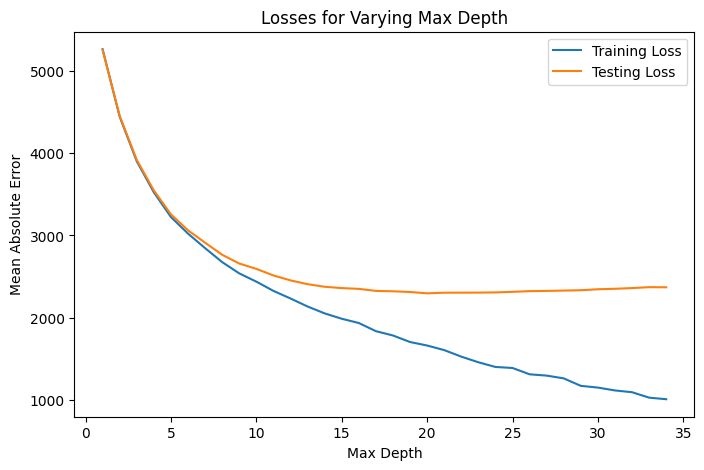

In [281]:
# XGB - Tunning de max depth para ver overfitting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Vary max_depth hyperparameter
max_depths = list(range(1, 35))
train_losses_depth = []
test_losses_depth = []

for max_depth in max_depths:
    rf = XGBRegressor(n_estimators=100, max_depth=max_depth, random_state=42, n_jobs=-1)
    rf.fit(XTrain_encoded, yTrain)
    
    train_pred = rf.predict(XTrain_encoded)
    test_pred = rf.predict(XTest_encoded)
    
    train_loss = mean_absolute_error(yTrain, train_pred)
    test_loss = mean_absolute_error(yTest, test_pred)
    
    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)

# Plot the training and testing losses for max_depth
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(max_depths, train_losses_depth, label="Training Loss")
ax1.plot(max_depths, test_losses_depth, label="Testing Loss")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Absolute Error")
ax1.legend()
ax1.set_title("Losses for Varying Max Depth")

plt.show()

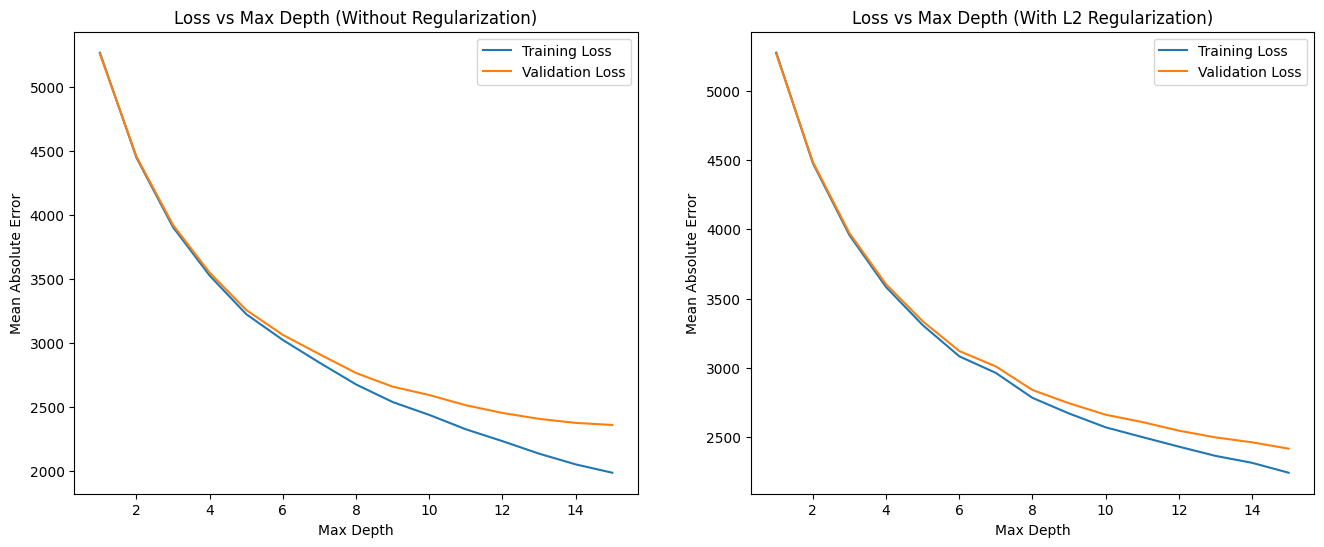

In [283]:
#Regularización y overfitting
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

train_losses_reg = []
val_losses_reg = []

max_depths = list(range(1, 16))

for max_depth in max_depths:
    # Train XGBoost without regularization
    xgb_model = xgb.XGBRegressor(max_depth=max_depth, random_state=42, n_jobs=-1)
    xgb_model.fit(XTrain_encoded, yTrain)
    train_loss = mean_absolute_error(yTrain, xgb_model.predict(XTrain_encoded))
    val_loss = mean_absolute_error(yTest, xgb_model.predict(XTest_encoded))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Train XGBoost with L2 regularization (reg_lambda)
    xgb_model_reg = xgb.XGBRegressor(max_depth=max_depth, reg_lambda=20, random_state=42, n_jobs=-1)
    xgb_model_reg.fit(XTrain_encoded, yTrain)
    train_loss_reg = mean_absolute_error(yTrain, xgb_model_reg.predict(XTrain_encoded))
    val_loss_reg = mean_absolute_error(yTest, xgb_model_reg.predict(XTest_encoded))
    train_losses_reg.append(train_loss_reg)
    val_losses_reg.append(val_loss_reg)

# Plot the training and validation losses without regularization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(max_depths, train_losses, label="Training Loss")
ax1.plot(max_depths, val_losses, label="Validation Loss")
ax1.set_title("Loss vs Max Depth (Without Regularization)")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Mean Absolute Error")
ax1.legend()

# Plot the training and validation losses with L2 regularization (reg_lambda)
ax2.plot(max_depths, train_losses_reg, label="Training Loss")
ax2.plot(max_depths, val_losses_reg, label="Validation Loss")
ax2.set_title("Loss vs Max Depth (With L2 Regularization)")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("Mean Absolute Error")
ax2.legend()

plt.show()

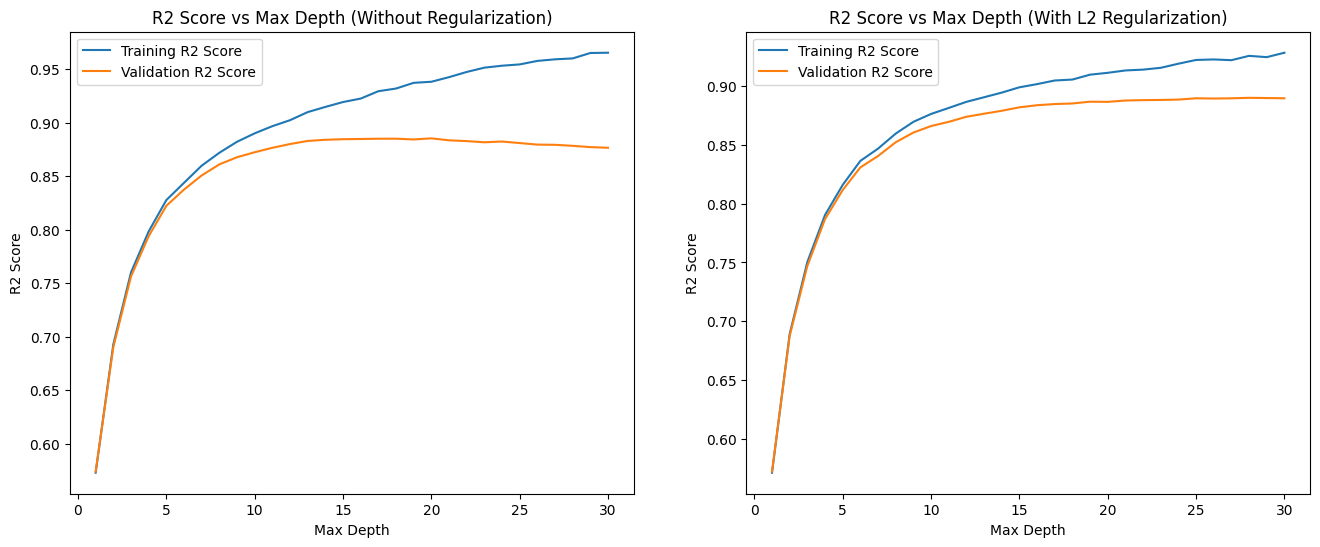

In [301]:
#Regularización y overfitting - COn R2
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Initialize lists to store training and validation R2 scores
train_r2_scores = []
val_r2_scores = []

train_r2_scores_reg = []
val_r2_scores_reg = []

max_depths = list(range(1, 31))

for max_depth in max_depths:
    # Train XGBoost without regularization
    xgb_model = xgb.XGBRegressor(max_depth=max_depth, random_state=42, n_jobs=-1)
    xgb_model.fit(XTrain_encoded, yTrain)
    train_r2 = r2_score(yTrain, xgb_model.predict(XTrain_encoded))
    val_r2 = r2_score(yTest, xgb_model.predict(XTest_encoded))
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

    # Train XGBoost with L2 regularization (reg_lambda)
    xgb_model_reg = xgb.XGBRegressor(max_depth=max_depth, reg_lambda=20, random_state=42, n_jobs=-1)
    xgb_model_reg.fit(XTrain_encoded, yTrain)
    train_r2_reg = r2_score(yTrain, xgb_model_reg.predict(XTrain_encoded))
    val_r2_reg = r2_score(yTest, xgb_model_reg.predict(XTest_encoded))
    train_r2_scores_reg.append(train_r2_reg)
    val_r2_scores_reg.append(val_r2_reg)

# Plot the training and validation R2 scores without regularization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(max_depths, train_r2_scores, label="Training R2 Score")
ax1.plot(max_depths, val_r2_scores, label="Validation R2 Score")
ax1.set_title("R2 Score vs Max Depth (Without Regularization)")
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("R2 Score")
ax1.legend()

# Plot the training and validation R2 scores with L2 regularization (reg_lambda)
ax2.plot(max_depths, train_r2_scores_reg, label="Training R2 Score")
ax2.plot(max_depths, val_r2_scores_reg, label="Validation R2 Score")
ax2.set_title("R2 Score vs Max Depth (With L2 Regularization)")
ax2.set_xlabel("Max Depth")
ax2.set_ylabel("R2 Score")
ax2.legend()

plt.show()


### Learning rates

[0]	eval-mae:8303.71598
[100]	eval-mae:5760.68036
[200]	eval-mae:5129.71376
[300]	eval-mae:4745.13372
[399]	eval-mae:4461.51622
[0]	eval-mae:8187.47802
[100]	eval-mae:5104.34724
[200]	eval-mae:4419.96247
[300]	eval-mae:4026.37265
[399]	eval-mae:3739.14557
[0]	eval-mae:7770.27034
[100]	eval-mae:3910.31052
[200]	eval-mae:3249.35214
[300]	eval-mae:2923.14658
[399]	eval-mae:2729.85706
[0]	eval-mae:7432.63626
[100]	eval-mae:3370.90401
[200]	eval-mae:2812.79332
[300]	eval-mae:2581.11315
[399]	eval-mae:2452.62838
[0]	eval-mae:7183.63934
[100]	eval-mae:3054.87523
[200]	eval-mae:2628.89228
[300]	eval-mae:2426.31503
[399]	eval-mae:2346.82454
[0]	eval-mae:7095.19539
[100]	eval-mae:2960.87986
[200]	eval-mae:2546.71140
[300]	eval-mae:2409.05637
[399]	eval-mae:2328.32317
[0]	eval-mae:7033.08982
[100]	eval-mae:2850.09935
[200]	eval-mae:2528.26370
[300]	eval-mae:2385.74990
[399]	eval-mae:2321.01125


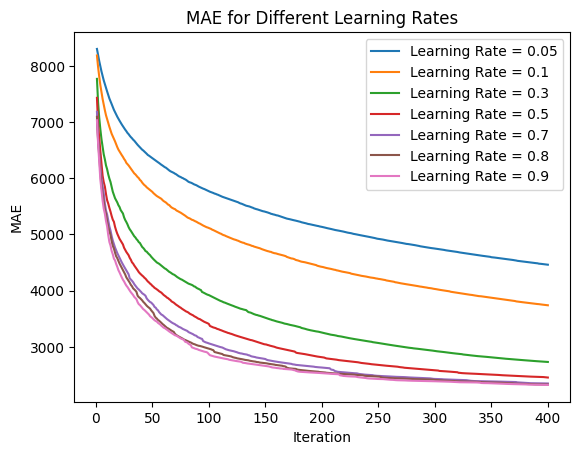

In [292]:
# Prepare data for XGBoost
import xgboost as xgb

dtrain = xgb.DMatrix(XTrain_encoded, label=yTrain)
dtest = xgb.DMatrix(XTest_encoded, label=yTest)

# Define the parameters for XGBoost
param = {
    'max_depth': 3,
    'n_jobs': -1,
    'objective': 'reg:linear',  # Cambiado a regresión lineal
    'eval_metric': 'mae'  # Usando MAE como métrica de evaluación
}
num_round = 400

# Train XGBoost with different learning rates
learning_rates = [0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]
loss_history = {}

for lr in learning_rates:
    param['eta'] = lr
    
    evals_result = {}  # Store evaluation results
    bst = xgb.train(param, dtrain, num_round, early_stopping_rounds=10, evals=[(dtest, 'eval')], evals_result=evals_result, verbose_eval=100)
    
    loss_history[lr] = evals_result['eval']['mae']  # Cambiado a 'mae'

# Plot the loss functions for each learning rate
for lr, losses in loss_history.items():
    plt.plot(range(1, len(losses) + 1), losses, label=f"Learning Rate = {lr}")

plt.xlabel("Iteration")
plt.ylabel("MAE")
plt.legend()
plt.title("MAE for Different Learning Rates")
plt.show()

### Calibracion n_estimators

In [302]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(50, 550, 50)

# Definición de lista para almacenar el MAE promedio para cada valor de n_estimators
mae_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = XGBRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    mae_scores.append(-cross_val_score(clf, XTrain_encoded, yTrain, cv=5, scoring='neg_mean_absolute_error').mean())  # Usando neg_mean_absolute_error para un problema de regresión



Text(0, 0.5, 'MAE')

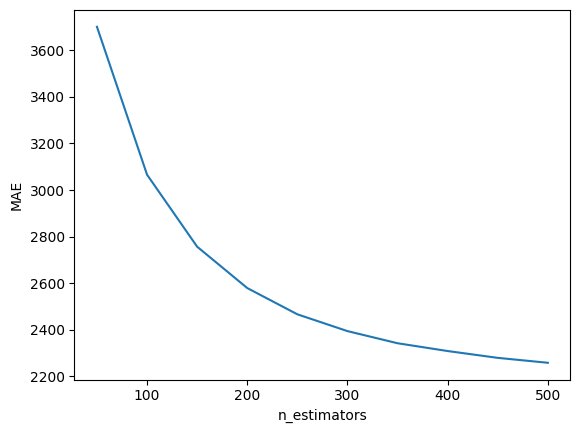

In [303]:
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, mae_scores)
plt.xlabel('n_estimators')
plt.ylabel('MAE')

# MODLEO FINAL - XGBOOST

In [5]:
# Transformacion de variables categoricas - One-Hot Encoding
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']

# Aplicar One-Hot Encoding a las variables categóricas
XTrain_encoded = pd.get_dummies(X, dtype=int)
XTrain_encoded.head()

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Definir el modelo XGBoost para un problema de regresión con paralelismo
clf = XGBRegressor(n_estimators = 600, learning_rate = 0.1, max_depth = 15, reg_lambda=20, n_jobs=-1)


# Entrenar el modelo
clf.fit(XTrain_encoded, y)

# Aplicar One-Hot Encoding a las variables categóricas en dataset Testing
indice = XTrain_encoded.columns.get_loc("Make_Freightliner")
XTest_encoded_final = pd.get_dummies(dataTesting, dtype=int)
columna = pd.Series([0] * len(XTest_encoded_final), name="Make_Freightliner")  # Crear la nueva columna con valores 0
XTest_encoded_final.insert(loc=indice, column="Make_Freightliner", value=columna)  # Insertar la columna

## Predicciones XGboost - Test
y_pred = clf.predict(XTest_encoded_final)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,21254.515625
1,37856.863281
2,23329.527344
3,8108.225586
4,30453.416016


In [12]:
type(y_pred)
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Convertir el DataFrame a una lista de Python
lista = y_pred.values.tolist()

lista


[[21254.515625],
 [37856.86328125],
 [23329.52734375],
 [8108.2255859375],
 [30453.416015625],
 [16174.0751953125],
 [19965.96484375],
 [28615.775390625],
 [44373.953125],
 [15648.9248046875],
 [18621.392578125],
 [16946.771484375],
 [36347.26171875],
 [20305.0625],
 [39734.7890625],
 [6009.265625],
 [24774.712890625],
 [31645.04296875],
 [16176.33203125],
 [21845.6015625],
 [10867.0869140625],
 [21639.021484375],
 [16590.529296875],
 [16064.3876953125],
 [30695.46484375],
 [16840.177734375],
 [25239.341796875],
 [31595.568359375],
 [23592.544921875],
 [24940.359375],
 [19074.853515625],
 [36175.96875],
 [13952.302734375],
 [23611.109375],
 [19508.130859375],
 [18663.994140625],
 [24013.623046875],
 [42070.92578125],
 [45699.328125],
 [39425.91796875],
 [15507.6142578125],
 [15608.7900390625],
 [25679.533203125],
 [38949.109375],
 [50832.29296875],
 [15460.962890625],
 [21729.244140625],
 [20475.5],
 [17707.376953125],
 [16265.919921875],
 [13572.3427734375],
 [17920.591796875],
 [1714

In [13]:
respuesta = [[21254.515625],
 [37856.86328125],
 [23329.52734375],
 [8108.2255859375],
 [30453.416015625],
 [16174.0751953125],
 [19965.96484375],
 [28615.775390625],
 [44373.953125],
 [15648.9248046875],
 [18621.392578125],
 [16946.771484375]]

# Convertir la lista de listas en una lista plana de números decimales
lista_de_decimales = [numero for sublista in respuesta for numero in sublista]

print(lista_de_decimales)


[21254.515625, 37856.86328125, 23329.52734375, 8108.2255859375, 30453.416015625, 16174.0751953125, 19965.96484375, 28615.775390625, 44373.953125, 15648.9248046875, 18621.392578125, 16946.771484375]


In [ ]:
# Transformacion de variables categoricas - One-Hot Encoding
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Datos X - y
X = dataTraining.drop(columns=['Price'])
y = dataTraining['Price']

# Aplicar One-Hot Encoding a las variables categóricas
XTrain_encoded = pd.get_dummies(X, dtype=int)
XTrain_encoded.head()

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Definir el modelo XGBoost para un problema de regresión con paralelismo
clf = XGBRegressor(n_estimators = 600, learning_rate = 0.1, max_depth = 15, reg_lambda=20, n_jobs=-1)


# Entrenar el modelo
clf.fit(XTrain_encoded, y)

# Aplicar One-Hot Encoding a las variables categóricas en dataset Testing
indice = XTrain_encoded.columns.get_loc("Make_Freightliner")
XTest_encoded_final = pd.get_dummies(dataTesting, dtype=int)
columna = pd.Series([0] * len(XTest_encoded_final), name="Make_Freightliner")  # Crear la nueva columna con valores 0
XTest_encoded_final.insert(loc=indice, column="Make_Freightliner", value=columna)  # Insertar la columna

## Predicciones XGboost - Test
y_pred = clf.predict(XTest_encoded_final)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Price']
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
0,21254.515625
1,37856.863281
2,23329.527344
3,8108.225586
4,30453.416016
